In [33]:
# import libraries
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,RandomForestClassifier,VotingClassifier
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [34]:
df = pd.read_csv('scaled_data.csv') # use os to store csv file
# use os to store csv file

x = df.drop(['Credit_Score'],axis=1) # drop target variable
column = x.columns  # store column names
y = df["Credit_Score"] # target variable


In [35]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # random forest model
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42) # extra tree model
knn_model = KNeighborsClassifier(n_neighbors=3) # knn model
des_tree = DecisionTreeClassifier(random_state=42) # decision tree model

In [13]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42) # gradient boosting model
hist_model = HistGradientBoostingClassifier(random_state=42) # histogram gradient boosting model


In [14]:
cat_model = CatBoostClassifier(verbose=0, n_estimators=100) # catboost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42) # xgboost model

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # split data into train and test

In [16]:
gb_model.fit(x_train, y_train) # fit gradient boosting model
print("Gradient Boosting Accuracy: ", accuracy_score(y_test, gb_model.predict(x_test))) # print accuracy score

Gradient Boosting Accuracy:  0.6772


In [17]:
hist_model.fit(x_train, y_train) # fit histogram gradient boosting model
print("Hist Gradient Boosting Accuracy: ", accuracy_score(y_test, hist_model.predict(x_test))) # print accuracy score

Hist Gradient Boosting Accuracy:  0.72755


In [18]:
cat_model.fit(x_train, y_train) # fit catboost model
print("CatBoost Accuracy: ", accuracy_score(y_test, cat_model.predict(x_test))) # print accuracy score
xgb_model.fit(x_train, y_train) # fit xgboost model
print("XGBoost Accuracy: ", accuracy_score(y_test, xgb_model.predict(x_test))) # print accuracy score

CatBoost Accuracy:  0.7017
XGBoost Accuracy:  0.74705


In [36]:
rf_model.fit(x_train, y_train) # fit random forest model
print("Random Forest Accuracy: ", accuracy_score(y_test, rf_model.predict(x_test))) # print accuracy score
et_model.fit(x_train, y_train) # fit extra tree model
print("Extra Trees Accuracy: ", accuracy_score(y_test, et_model.predict(x_test))) # print accuracy score
knn_model.fit(x_train, y_train) # fit knn model
print("KNN Accuracy: ", accuracy_score(y_test, knn_model.predict(x_test))) # print accuracy score
des_tree.fit(x_train, y_train) # fit decision tree model
print("Decision Tree Accuracy: ", accuracy_score(y_test, des_tree.predict(x_test))) # print accuracy score

Random Forest Accuracy:  0.82985
Extra Trees Accuracy:  0.82985
KNN Accuracy:  0.815
Decision Tree Accuracy:  0.8113


confusion matrix it is used to evaluate the performance of a classification model
classification report it is used to measure the quality of predictions from a classification algorithm

In [18]:
# confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, rf_model.predict(x_test))) # print confusion matrix for random forest
print("Classification Report: \n", classification_report(y_test, rf_model.predict(x_test))) # print classification report for random forest

print("Confusion Matrix: \n", confusion_matrix(y_test, et_model.predict(x_test))) # print confusion matrix for extra tree
print("Classification Report: \n", classification_report(y_test, et_model.predict(x_test))) # print classification report for extra tree

print("Confusion Matrix: \n", confusion_matrix(y_test, knn_model.predict(x_test))) # print confusion matrix for knn
print("Classification Report: \n", classification_report(y_test, knn_model.predict(x_test))) # print classification report for knn

print("Confusion Matrix: \n", confusion_matrix(y_test, des_tree.predict(x_test))) # print confusion matrix for decision tree
print("Classification Report: \n", classification_report(y_test, des_tree.predict(x_test)))  # print classification report for decision tree



Confusion Matrix: 
 [[4875  996    3]
 [1015 8918  666]
 [   2  697 2828]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      5874
           1       0.84      0.84      0.84     10599
           2       0.81      0.80      0.81      3527

    accuracy                           0.83     20000
   macro avg       0.83      0.82      0.82     20000
weighted avg       0.83      0.83      0.83     20000

Confusion Matrix: 
 [[4875  997    2]
 [ 999 8939  661]
 [   2  726 2799]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      5874
           1       0.84      0.84      0.84     10599
           2       0.81      0.79      0.80      3527

    accuracy                           0.83     20000
   macro avg       0.83      0.82      0.82     20000
weighted avg       0.83      0.83      0.83     20000

Confusion Matrix: 
 [[5052  814    8]


voting classifier with hard voting it will take the majority of votes from all the models

In [31]:
ensemble_model = VotingClassifier(estimators=[ # ensemble model with voting classifier
    ('Random Forest', rf_model), # Random Forest model
    ('Extra Trees', et_model), # Extra Trees model
    ("Decision Tree", des_tree), # Decision Tree model
    ("KNN", knn_model) # KNN model
], voting='hard',weights=[1,1,1,1])
ensemble_model.fit(x_train, y_train) # fit ensemble model
print("Ensemble Accuracy: ", accuracy_score(y_test, ensemble_model.predict(x_test))) # print accuracy score



Ensemble Accuracy:  0.8346


creates a bar plot that displays the accuracy of different machine learning models. It uses the scikit-learn library to calculate the accuracy scores and stores them in a pandas DataFrame. The seaborn library is used to create the bar plot, and the `annotate` method is used to add text to the plot. Finally, the plot is displayed using the `show` method from matplotlib.

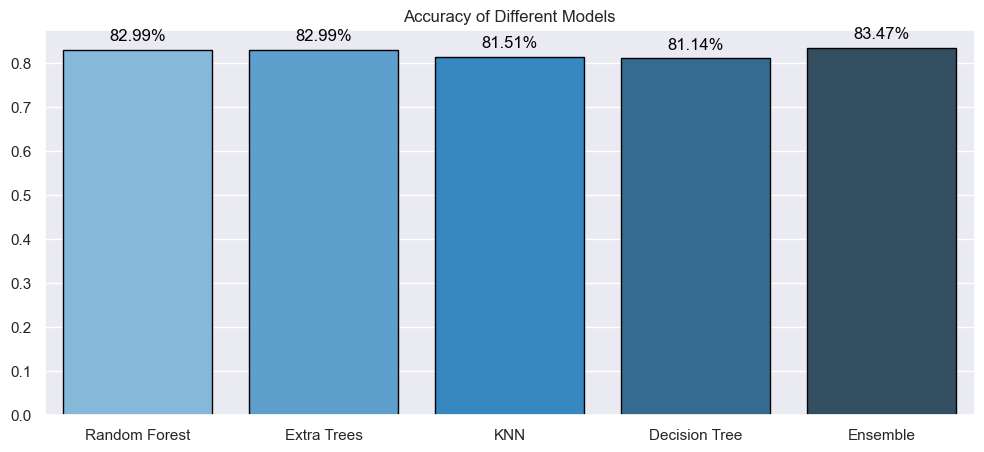

In [32]:

res_plot = pd.DataFrame({
    "Random Forest": [accuracy_score(y_test, rf_model.predict(x_test))],
    "Extra Trees": [accuracy_score(y_test, et_model.predict(x_test))],
    "KNN": [accuracy_score(y_test, knn_model.predict(x_test))],
    "Decision Tree": [accuracy_score(y_test, des_tree.predict(x_test))],
    'Ensemble': [accuracy_score(y_test, ensemble_model.predict(x_test))],
    'Catboost': [accuracy_score(y_test, cat_model.predict(x_test))],
    'Xgboost': [accuracy_score(y_test, xgb_model.predict(x_test))],
    'Gradient': [accuracy_score(y_test, gb_model.predict(x_test))],
    'Hist': [accuracy_score(y_test, hist_model.predict(x_test))],
}, index=["Accuracy"])
plt.figure(figsize=(12, 5))
sns.set_theme(style="darkgrid")
# add gap between bars
sns.barplot(data=res_plot, palette="Blues_d", linewidth=1, edgecolor="black", saturation=1)
# add text to barplot
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{round((p.get_height()+.0001) * 100, 2)}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        xytext=(0, 10),
        textcoords="offset points",
    )
plt.title("Accuracy of Different Models")
plt.show()

In [26]:
cross_val_rf = cross_val_predict(rf_model, x_train, y_train, cv=10) # cross validation for random forest
cross_val_et = cross_val_predict(et_model, x_train, y_train, cv=10) # cross validation for extra tree
cross_val_knn = cross_val_predict(knn_model, x_train, y_train, cv=10) # cross validation for knn
cross_val_des = cross_val_predict(des_tree, x_train, y_train, cv=10) # cross validation for decision tree
cross_val_ensemble = cross_val_predict(ensemble_model, x_train, y_train, cv=10) # cross validation for ensemble model

print(f"Random Forest Classifier Accuracy: {accuracy_score(y_train, cross_val_rf)}") # print accuracy score for random forest
print(f"Extra Trees Classifier Accuracy: {accuracy_score(y_train, cross_val_et)}") # print accuracy score for extra tree
print(f"KNN Classifier Accuracy: {accuracy_score(y_train, cross_val_knn)}") # print accuracy score for knn
print(f"Ensemble Model Accuracy: {accuracy_score(y_train, cross_val_ensemble)}") # print accuracy score for ensemble model
print(f"Decision Tree Accuracy: {accuracy_score(y_train, cross_val_des)}") # print accuracy score for decision tree

Random Forest Classifier Accuracy: 0.820825
Extra Trees Classifier Accuracy: 0.8217
KNN Classifier Accuracy: 0.812925
Ensemble Model Accuracy: 0.8243875
Decision Tree Accuracy: 0.80845


creates a bar plot that shows the accuracy of different machine learning models with cross-validation. It uses the scikit-learn library to calculate the accuracy scores and stores them in a pandas DataFrame. The seaborn library is used to create the bar plot, and the `annotate` method is used to add text to the plot. Finally, the plot is displayed using the `show` method from matplotlib.

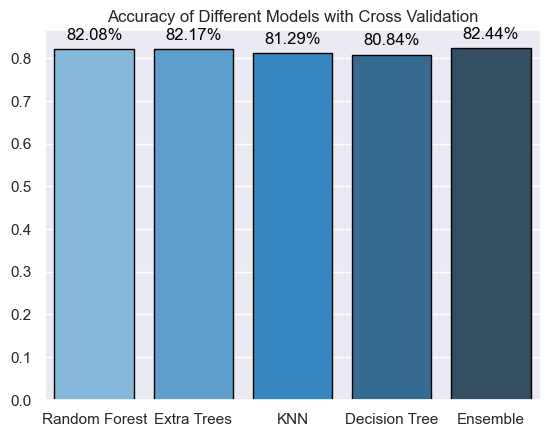

In [27]:
res_plot_vol = pd.DataFrame({
    "Random Forest": [accuracy_score(y_train, cross_val_rf)],
    "Extra Trees": [accuracy_score(y_train, cross_val_et)],
    "KNN": [accuracy_score(y_train, cross_val_knn)],
    "Decision Tree": [accuracy_score(y_train, cross_val_des)],
    "Ensemble": [accuracy_score(y_train, cross_val_ensemble)]
})
sns.set_theme(style="darkgrid")
sns.barplot(data=res_plot_vol, palette="Blues_d", linewidth=1, edgecolor="black", saturation=1)
# add text to barplot
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{round(p.get_height() * 100, 2)}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        xytext=(0, 10),
        textcoords="offset points",
    )
plt.title("Accuracy of Different Models with Cross Validation")
plt.show()